In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier,BaggingClassifier

from sklearn.metrics import classification_report

!pip install xgboost
from xgboost import XGBClassifier
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [86]:
df_train=pd.read_csv("/content/Titanic_train.csv")
df_test=pd.read_csv("/content/Titanic_test.csv")

In [87]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [88]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [89]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [90]:
df_train.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [91]:
df_train['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [92]:
df_train['Survived'].value_counts()

,count
Survived,
0,549
1,342


In [93]:
df_train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [94]:
df_train['Embarked'].mode()[0]

'S'

In [95]:
df_train['Embarked'].fillna(df_train['Embarked'].mode()[0],inplace=True)

In [96]:
df_train.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [97]:
df_train['Age'].mean()

np.float64(29.69911764705882)

In [98]:
df_train['Age'].fillna(df_train['Age'].mean(),inplace=True)

In [99]:
df_train.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [100]:
df_train['Cabin'].mode()[0]

'B96 B98'

In [101]:
df_train['Cabin'].fillna(df_train['Cabin'].mode()[0],inplace=True)

In [102]:
df_train.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [103]:
df_train = df_train.drop(df_train.columns[[0,3]], axis=1)

In [104]:
df_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.000000,1,0,A/5 21171,7.2500,B96 B98,S
1,1,1,female,38.000000,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.000000,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,1,1,female,35.000000,1,0,113803,53.1000,C123,S
4,0,3,male,35.000000,0,0,373450,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,211536,13.0000,B96 B98,S
887,1,1,female,19.000000,0,0,112053,30.0000,B42,S
888,0,3,female,29.699118,1,2,W./C. 6607,23.4500,B96 B98,S
889,1,1,male,26.000000,0,0,111369,30.0000,C148,C


In [105]:
from sklearn.preprocessing import LabelEncoder

In [106]:
encoder=LabelEncoder()
df_train['Ticket']=encoder.fit_transform(df_train['Ticket'])

In [107]:
df_train['Cabin']=encoder.fit_transform(df_train['Cabin'])

In [108]:
df_train['Embarked']=encoder.fit_transform(df_train['Embarked'])

In [109]:
df_train['Sex']=encoder.fit_transform(df_train['Sex'])

In [110]:
df_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,1,22.000000,1,0,523,7.2500,47,2
1,1,1,0,38.000000,1,0,596,71.2833,81,0
2,1,3,0,26.000000,0,0,669,7.9250,47,2
3,1,1,0,35.000000,1,0,49,53.1000,55,2
4,0,3,1,35.000000,0,0,472,8.0500,47,2
...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,101,13.0000,47,2
887,1,1,0,19.000000,0,0,14,30.0000,30,2
888,0,3,0,29.699118,1,2,675,23.4500,47,2
889,1,1,1,26.000000,0,0,8,30.0000,60,0


In [111]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [112]:
df_test = df_test.drop(df_test.columns[[0,2]], axis=1)

In [113]:
df_test

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,male,34.5,0,0,330911,7.8292,NaN,Q
1,3,female,47.0,1,0,363272,7.0000,NaN,S
2,2,male,62.0,0,0,240276,9.6875,NaN,Q
3,3,male,27.0,0,0,315154,8.6625,NaN,S
4,3,female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1,female,39.0,0,0,PC 17758,108.9000,C105,C
415,3,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,3,male,NaN,0,0,359309,8.0500,NaN,S


In [114]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Ticket    418 non-null    object 
 6   Fare      417 non-null    float64
 7   Cabin     91 non-null     object 
 8   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(4)
memory usage: 29.5+ KB


In [115]:
df_test.describe()

,Pclass,Age,SibSp,Parch,Fare
count,418.000000,332.000000,418.000000,418.000000,417.000000
mean,2.265550,30.272590,0.447368,0.392344,35.627188
std,0.841838,14.181209,0.896760,0.981429,55.907576
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,27.000000,0.000000,0.000000,14.454200
75%,3.000000,39.000000,1.000000,0.000000,31.500000
max,3.000000,76.000000,8.000000,9.000000,512.329200


<Axes: ylabel='Fare'>

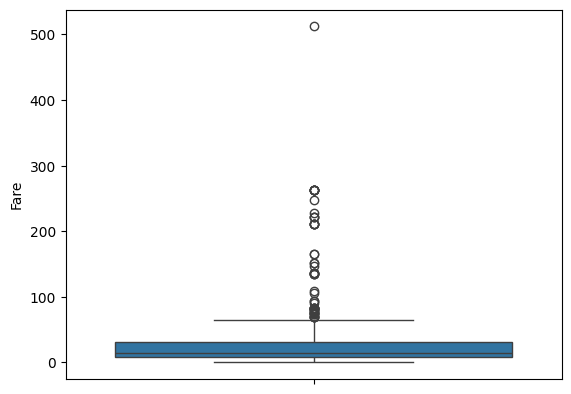

In [116]:
sns.boxplot(df_test['Fare'])

In [117]:
df_test.isna().sum()

,0
Pclass,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327
Embarked,0


In [118]:
df_test['Fare'].median()

14.4542

In [119]:
df_test['Fare'].fillna(df_test['Fare'].median(),inplace=True)

In [120]:
df_test['Age'].mean()

np.float64(30.272590361445783)

In [121]:
df_test['Age'].fillna(df_test['Age'].mean(),inplace=True)

In [122]:
df_test['Cabin'].mode()[0]

'B57 B59 B63 B66'

In [123]:
df_test['Cabin'].fillna(df_test['Cabin'].mode()[0],inplace=True)

In [124]:
df_test.isna().sum()

,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,0
Embarked,0


In [125]:
df_test

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,male,34.50000,0,0,330911,7.8292,B57 B59 B63 B66,Q
1,3,female,47.00000,1,0,363272,7.0000,B57 B59 B63 B66,S
2,2,male,62.00000,0,0,240276,9.6875,B57 B59 B63 B66,Q
3,3,male,27.00000,0,0,315154,8.6625,B57 B59 B63 B66,S
4,3,female,22.00000,1,1,3101298,12.2875,B57 B59 B63 B66,S
...,...,...,...,...,...,...,...,...,...
413,3,male,30.27259,0,0,A.5. 3236,8.0500,B57 B59 B63 B66,S
414,1,female,39.00000,0,0,PC 17758,108.9000,C105,C
415,3,male,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,B57 B59 B63 B66,S
416,3,male,30.27259,0,0,359309,8.0500,B57 B59 B63 B66,S


In [126]:
df_test['Ticket']=encoder.fit_transform(df_test['Ticket'])

In [127]:
df_test['Cabin']=encoder.fit_transform(df_test['Cabin'])

In [128]:
df_test['Embarked']=encoder.fit_transform(df_test['Embarked'])

In [129]:
df_test['Sex'].unique()

array(['male', 'female'], dtype=object)

In [130]:
df_test['Sex']=encoder.fit_transform(df_test['Sex'])

In [131]:
xtrain = df_train.drop('Survived', axis=1)  # target column name
ytrain = df_train['Survived']

xtest = df_test.copy()


<Axes: >

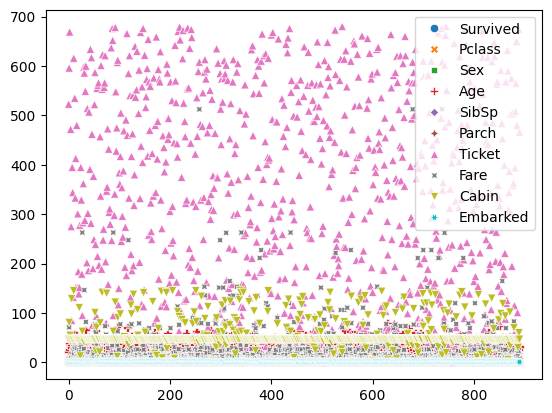

In [132]:
sns.scatterplot(df_train)

<Axes: >

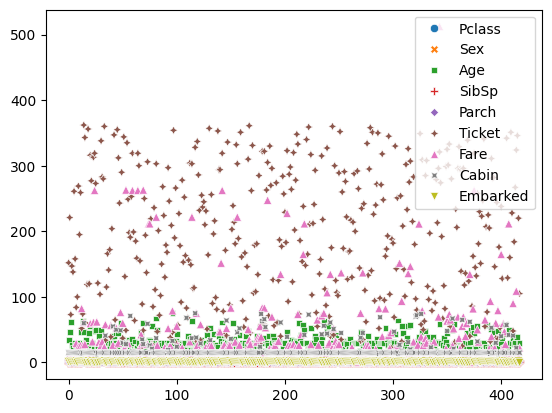

In [133]:
sns.scatterplot(df_test)

In [134]:
def prediction(model):
  model.fit(xtrain,ytrain)
  ypred = model.predict(xtest)
  print('Train Accuracy: ',model.score(xtrain,ytrain))
 # print('Test Accuracy: ',model.score(xtest,ytest))

# **XGBM Algorithm**

In [135]:
prediction(XGBClassifier())

Train Accuracy:  0.9910213243546577


In [136]:
model =XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric='logloss'
)

model.fit(xtrain, ytrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, ...)

In [137]:
print('Train Accuracy: ',model.score(xtrain,ytrain))

Train Accuracy:  0.9708193041526375


In [138]:
params = {
    'n_estimators' : [90,110,150], # randomly select no. of trees/models
    'learning_rate' : [0.5,0.7,1], # alpha between 0 to 1
    'lambda': [1,2,3],
    'max_depth' : [3,7,11]
}

In [139]:
grid = GridSearchCV(XGBClassifier(),param_grid=params,verbose=1)
grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     lea...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'lambda': [1, 2, 3], 'learning_rate': [0.5, 0.7, 1],
                         'max_depth': [3, 7, 11],
                         'n_estimators': [90, 110, 150]},
             verbose=1)

In [140]:
grid.best_params_

{'lambda': 3, 'learning_rate': 0.5, 'max_depth': 3, 'n_estimators': 110}

In [141]:
prediction(XGBClassifier(reg_lambda=3,learning_rate=0.5,max_depth=3,n_estimators=110))

Train Accuracy:  0.9483726150392817


# **LGBM Algorithm**

In [142]:
!pip install lightgbm
import lightgbm as lgb

In [143]:
model_lgbm = lgb.LGBMClassifier(
    boosting_type='gbdt',
    n_estimators=300,
    learning_rate=0.05,
    max_depth=-1,
    num_leaves=31,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

model_lgbm.fit(xtrain, ytrain)

[LightGBM] [Info] Number of positive: 342, number of negative: 549
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000164 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 540
[LightGBM] [Info] Number of data points in the train set: 891, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383838 -> initscore=-0.473288
[LightGBM] [Info] Start training from score -0.473288
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


LGBMClassifier(colsample_bytree=0.8, learning_rate=0.05, n_estimators=300,
               random_state=42, subsample=0.8)

In [144]:
y_pred = model_lgbm.predict(xtest)

In [145]:
y_pred

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [146]:
print('Train Accuracy: ',model_lgbm.score(xtrain,ytrain))

Train Accuracy:  0.9943883277216611


Comparison

XGBM Training Accuracy is:0.9483726150392817
LGBM Training Accuracy is:0.9943883277216611

By seeing the traini accuracy of both the algorithms we can states that LGBM algorithm is very powerful, effective and much faster than XGBoost

also the risk of overfitting of LGBM model is higher than XGBoost

LGBM uses low memory while XGBoost uses slightly more memory than LGBoost